# Proyek Analisis Data: [Bike-Sharing Dataset]
- **Nama:** Anisya Nugraheni Fauziyyah
- **Email:** anisyanugraheni@mal.ugm.ac.id
- **ID Dicoding:**  anisya_nugraheni_fauziyyah_gvBu

## Menentukan Pertanyaan Bisnis

- Berapa jumlah keseluruhan pelanggan yang meminjam sepeda berdasarkan jenis hari(holiday atau tidak holiday) dan mana yang lebih banyak?
- Berapa jumlah keseluruhan pelanggan yang meminjam sepeda setiap jamnnya? dan pukul berapa yang pelanggannya paling banyak?

```

```



## Menyiapkan semua library yang dbutuhkan

In [128]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Gathering Data

Berikut merupakan data pelanggan berdasarkan hari

In [129]:
day =  pd.read_csv('https://raw.githubusercontent.com/nisyyyyyyyyy/Analisis-Data-main/main/DATA/day.csv' )
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Berikut merupakan data pelanggan berdasarkan jam

In [130]:
hour =pd.read_csv('https://raw.githubusercontent.com/nisyyyyyyyyy/Analisis-Data-main/main/DATA/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

# Menilai tabel `day`

In [131]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [132]:
 day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [133]:
print("Jumlah duplikasi : ",day.duplicated().sum())

Jumlah duplikasi :  0


In [134]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Menilai tabel `hour`

In [135]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [136]:
print("Jumlah duplikasi: ", hour.duplicated().sum())
hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Cleaning Data

### Membersihkan tabel `day`

In [137]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Memperbaiki tipe data

In [138]:
datatime_colums = ["dteday"]

for column in datatime_colums:
  day[column] =pd.to_datetime(day[column])

In [139]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [140]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Duplicate data

In [141]:
day.duplicated().sum()

0

In [142]:
day.drop_duplicates(inplace=True)

In [143]:
print("Jumlah duplikasi : ", day.duplicated().sum())

Jumlah duplikasi :  0


### Missing values

In [144]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Innaccurate value

In [145]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Membersihkan tabel `hour`

In [146]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Memperbaiki tipe data

In [147]:
datetime_colums = ["dteday"]

for column in datetime_colums:
  hour[column] = pd.to_datetime(hour[column])

In [148]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [149]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Duplicate data

In [150]:
hour.duplicated().sum()

0

### Missing Value

In [178]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Innaccurate value

In [179]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Exploratory Data Analysis (EDA)

## Explore `day`

In [151]:
day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
305,306,2011-11-02,4,0,11,0,3,1,1,0.377500,0.390133,0.718750,0.082092,370,3816,4186
73,74,2011-03-15,1,0,3,0,2,1,2,0.317391,0.318178,0.655652,0.184309,289,1767,2056
523,524,2012-06-07,2,1,6,0,4,1,1,0.602500,0.569442,0.567083,0.157350,1038,6456,7494
167,168,2011-06-17,2,0,6,0,5,1,1,0.649167,0.600383,0.735833,0.143029,863,3981,4844
716,717,2012-12-17,4,1,12,0,1,1,2,0.393333,0.401500,0.907083,0.098258,212,4373,4585


In [152]:
day.describe(include="all")

<ipython-input-152-0f75e45f5a45>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [153]:
day.cnt.is_unique

False

In [154]:
day.cnt.duplicated

<bound method Series.duplicated of 0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64>

In [155]:
day.groupby(by="holiday").agg({
    "holiday": "nunique",
    "cnt": ["max","min","mean","std"]
})

holiday   cnt                                
        nunique   max   min         mean          std
holiday                                              
0             1  8714    22  4527.104225  1929.013947
1             1  7403  1000  3735.000000  2103.350660

In [156]:
day.groupby(by="workingday").holiday.nunique().sort_values(ascending=False)

workingday
0    2
1    1
Name: holiday, dtype: int64

In [157]:
day.groupby(by="weekday").holiday.nunique().sort_values(ascending=False)

weekday
1    2
2    2
3    2
4    2
5    2
0    1
6    1
Name: holiday, dtype: int64

##Explore `hour`

In [158]:
hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6424,6425,2011-09-30,4,0,9,6,0,5,1,1,0.52,0.5000,0.83,0.2239,0,98,98
6947,6948,2011-10-22,4,0,10,2,0,6,0,1,0.40,0.4091,0.62,0.2537,6,25,31
550,551,2011-01-25,1,0,1,2,0,2,1,1,0.16,0.1515,0.69,0.2239,0,2,2
855,856,2011-02-08,1,0,2,2,0,2,1,2,0.26,0.2727,0.93,0.1045,1,1,2
16162,16163,2012-11-11,4,1,11,4,0,0,0,1,0.32,0.3333,0.81,0.1045,5,6,11


In [159]:
hour.cnt.is_unique

False

In [160]:
hour.groupby(by="hr").agg({
    "hr": "nunique",
    "cnt": ["max","min","mean","std"]
})

hr  cnt                            
   nunique  max min        mean         std
hr                                         
0        1  283   2   53.898072   42.307910
1        1  168   1   33.375691   33.538727
2        1  132   1   22.869930   26.578642
3        1   79   1   11.727403   13.239190
4        1   28   1    6.352941    4.143818
5        1   66   1   19.889819   13.200765
6        1  213   1   76.044138   55.084348
7        1  596   1  212.064649  161.441936
8        1  839   5  359.011004  235.189285
9        1  426  14  219.309491   93.703458
10       1  539   8  173.668501  102.205413
11       1  663  10  208.143054  127.495536
12       1  776   3  253.315934  145.081134
13       1  760  11  253.661180  148.107657
14       1  750  12  240.949246  147.271574
15       1  750   7  251.233196  144.632541
16       1  783  11  311.983562  148.682618
17       1  976  15  461.452055  232.656611
18       1  977  23  425.510989  224.639304
19       1  743  11  311.523352  161.050359
20       1  567  11  226.030220  119.670164
21       1  584   6  172.314560   89.788893
22       1  502   9  131.335165   69.937782
23       1  256   2   87.831044   50.846889

In [161]:
hour.groupby(by="workingday").hr.nunique().sort_values(ascending=False)

workingday
0    24
1    24
Name: hr, dtype: int64

In [162]:
hour.groupby(by="weekday").hr.nunique().sort_values(ascending=False)

weekday
0    24
1    24
2    24
3    24
4    24
5    24
6    24
Name: hr, dtype: int64

## Explore `day` dan `hour`

In [163]:
day_hour=pd.merge(
   left=day,
    right=hour,
    how="left",
    left_on="weekday",
    right_on="weekday"
)
day_hour.head()

,instant_x,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday,workingday_x,weathersit_x,temp_x,...,holiday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [164]:
day_hour.groupby(by="weekday").agg({
    "holiday_x": "nunique",
    "cnt_y": "sum"
})

,holiday_x,cnt_y
weekday,,
0,1,46622835
1,2,47827815
2,2,48787336
3,2,49196992
4,2,50481080
5,2,50730160
6,1,50169735


## Visualization & Explanatory Analysis










### Pertanyaan 1: Berapa jumlah keseluruhan pelanggan yang meminjam sepeda berdasarkan jenis hari(holiday atau tidak holiday) dan mana yang lebih banyak?

In [166]:
day.sample(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
668,669,2012-10-30,4,1,10,0,2,1,2,0.318182,0.309909,0.825455,0.213009,87,1009,1096
511,512,2012-05-26,2,1,5,0,6,0,1,0.692500,0.642696,0.732500,0.198992,2855,3681,6536
624,625,2012-09-16,3,1,9,0,0,0,1,0.580000,0.563125,0.570000,0.090183,2166,5167,7333
48,49,2011-02-18,1,0,2,0,5,1,1,0.521667,0.511983,0.516667,0.264925,579,2348,2927
190,191,2011-07-10,3,0,7,0,0,0,1,0.747500,0.690025,0.578333,0.183471,1743,3138,4881
317,318,2011-11-14,4,0,11,0,1,1,1,0.530000,0.524612,0.587083,0.306596,595,3891,4486
588,589,2012-08-11,3,1,8,0,6,0,2,0.692500,0.638267,0.732917,0.206479,2247,4052,6299


In [167]:
by_day = day.groupby(by="holiday").agg({
    "holiday":"nunique",
    "cnt": ["max","min","mean","std"]
})
by_day.head()

holiday   cnt                                
        nunique   max   min         mean          std
holiday                                              
0             1  8714    22  4527.104225  1929.013947
1             1  7403  1000  3735.000000  2103.350660

In [168]:
import pandas as pd

# Data
data = {
    'holiday': [0, 1],
    'max': [8714, 7403],
    'min': [22, 1000],
    'mean': [4527.104225, 3735.000000],
    'std': [1929.013947, 2103.350660]
}

# Membuat DataFrame
by_day = pd.DataFrame(data)

# Mengganti nama indeks
by_day = by_day.rename(index={0: 'Bukan Holiday', 1: 'Holiday'})

print(by_day)

               holiday   max   min         mean          std
Bukan Holiday        0  8714    22  4527.104225  1929.013947
Holiday              1  7403  1000  3735.000000  2103.350660


In [169]:
import pandas as pd

# Data
data = {
    'holiday1': ['Bukan Holiday', 'Holiday'],
    'max': [8714, 7403],
    'min': [22, 1000],
    'mean': [4527.104225, 3735.000000],
    'std': [1929.013947, 2103.350660]
}

# Membuat DataFrame
by_day = pd.DataFrame(data)

# Mengubah indeks menjadi kolom
by_day.reset_index(inplace=True)

# Mengganti nama kolom
by_day = by_day.rename(columns={'index': 'holiday'})

print(by_day)

   holiday       holiday1   max   min         mean          std
0        0  Bukan Holiday  8714    22  4527.104225  1929.013947
1        1        Holiday  7403  1000  3735.000000  2103.350660


<ipython-input-180-10f1ce873bf0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-180-10f1ce873bf0>:4: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


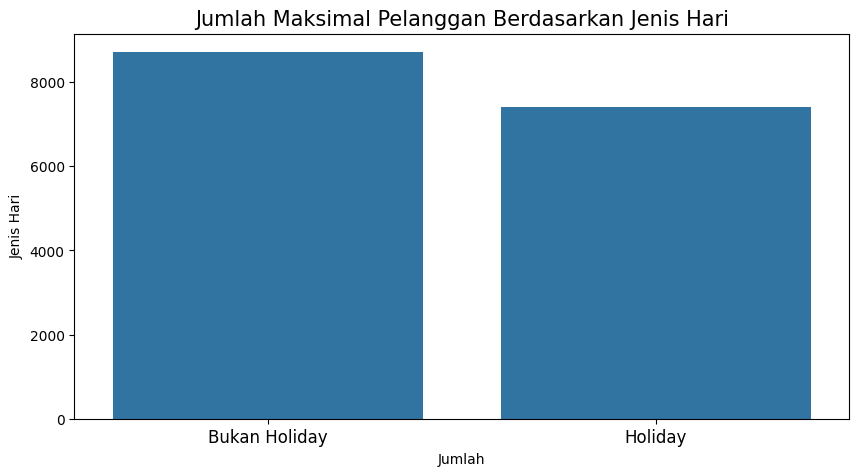

In [180]:
plt.figure(figsize=(10, 5))

colors = ["#1f77b4"]
sns.barplot(
    y="max",
    x="holiday1",
    data=by_day.sort_values(by="max", ascending=False),
    palette=colors
)
plt.title("Jumlah Maksimal Pelanggan Berdasarkan Jenis Hari", loc="center", fontsize=15)
plt.ylabel('Jenis Hari')
plt.xlabel('Jumlah')
plt.tick_params(axis='x', labelsize=12)

plt.show()

Berdasarkan grafik diatas diperoleh bahwa jumlah keseluruhan pelanggan yang meminjam sepeda pada saat bukan holiday lebih banyak daripada saat holiday yaitu  8714 sedangkan saat holiday jumlah keseluruhan pelanggan adalah 7403.





### Pertanyaan 2: Berapa jumlah paling banyak keseluruhan pelanggan yang meminjam sepeda setiap jamnya? dan yang paling banyak di pukul berapa?


In [171]:
hour.sample(7)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8742,8743,2012-01-05,1,1,1,2,0,4,1,1,0.20,0.2273,0.51,0.0896,0,4,4
16796,16797,2012-12-07,4,1,12,15,0,5,1,2,0.36,0.3485,0.71,0.1642,34,269,303
4595,4596,2011-07-15,3,0,7,9,0,5,1,1,0.68,0.6364,0.54,0.1940,31,176,207
12152,12153,2012-05-26,2,1,5,13,0,6,0,1,0.76,0.7273,0.66,0.1940,265,274,539
16026,16027,2012-11-05,4,1,11,11,0,1,1,1,0.34,0.3182,0.46,0.2239,31,119,150
3848,3849,2011-06-14,2,0,6,6,0,2,1,1,0.54,0.5152,0.56,0.2985,6,107,113
11075,11076,2012-04-11,2,1,4,16,0,3,1,1,0.44,0.4394,0.33,0.2985,51,256,307


In [172]:
hour.groupby(by="hr").agg({
    "hr": "nunique",
    "cnt": ["max","min","mean","std"]
})


hr  cnt                            
   nunique  max min        mean         std
hr                                         
0        1  283   2   53.898072   42.307910
1        1  168   1   33.375691   33.538727
2        1  132   1   22.869930   26.578642
3        1   79   1   11.727403   13.239190
4        1   28   1    6.352941    4.143818
5        1   66   1   19.889819   13.200765
6        1  213   1   76.044138   55.084348
7        1  596   1  212.064649  161.441936
8        1  839   5  359.011004  235.189285
9        1  426  14  219.309491   93.703458
10       1  539   8  173.668501  102.205413
11       1  663  10  208.143054  127.495536
12       1  776   3  253.315934  145.081134
13       1  760  11  253.661180  148.107657
14       1  750  12  240.949246  147.271574
15       1  750   7  251.233196  144.632541
16       1  783  11  311.983562  148.682618
17       1  976  15  461.452055  232.656611
18       1  977  23  425.510989  224.639304
19       1  743  11  311.523352  161.050359
20       1  567  11  226.030220  119.670164
21       1  584   6  172.314560   89.788893
22       1  502   9  131.335165   69.937782
23       1  256   2   87.831044   50.846889

In [173]:
by_hour= hour.groupby(by="hr").agg({
    "hr": "nunique",
    "cnt": ["max","min","mean"]
})

In [174]:
import pandas as pd

# Data
data = {
    'hr1': ['0', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'],
    'max': [283,168,132,79,28,66,213,596,839,426,539,663,776,760,750,750,783,976,977,743,567,584,502,256],
    'min': [2,1,1,1,1,1,1,1,5,14,8,10,3,11,12,7,11,15,23,11,11,6,9,2],
    'mean': [53.898072,33.375691,22.869930,11.727403,6.352941,19.889819,76.044138,212.064649,359.011004,219.309491,173.668501	,208.143054,253.315934,253.661180, 240.949246,251.233196,311.983562,461.452055,425.510989,311.523352,226.030220, 172.314560,131.335165,87.831044	]
}

# Membuat DataFrame
by_hour = pd.DataFrame(data)

# Mengubah indeks menjadi kolom
by_hour.reset_index(inplace=True)

# Mengganti nama kolom
by_hour = by_hour.rename(columns={'index': 'hr'})

print(by_hour)

    hr hr1  max  min        mean
0    0   0  283    2   53.898072
1    1   1  168    1   33.375691
2    2   2  132    1   22.869930
3    3   3   79    1   11.727403
4    4   4   28    1    6.352941
5    5   5   66    1   19.889819
6    6   6  213    1   76.044138
7    7   7  596    1  212.064649
8    8   8  839    5  359.011004
9    9   9  426   14  219.309491
10  10  10  539    8  173.668501
11  11  11  663   10  208.143054
12  12  12  776    3  253.315934
13  13  13  760   11  253.661180
14  14  14  750   12  240.949246
15  15  15  750    7  251.233196
16  16  16  783   11  311.983562
17  17  17  976   15  461.452055
18  18  18  977   23  425.510989
19  19  19  743   11  311.523352
20  20  20  567   11  226.030220
21  21  21  584    6  172.314560
22  22  22  502    9  131.335165
23  23  23  256    2   87.831044


<ipython-input-175-291235078610>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-175-291235078610>:7: UserWarning: 
The palette list has fewer values (1) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


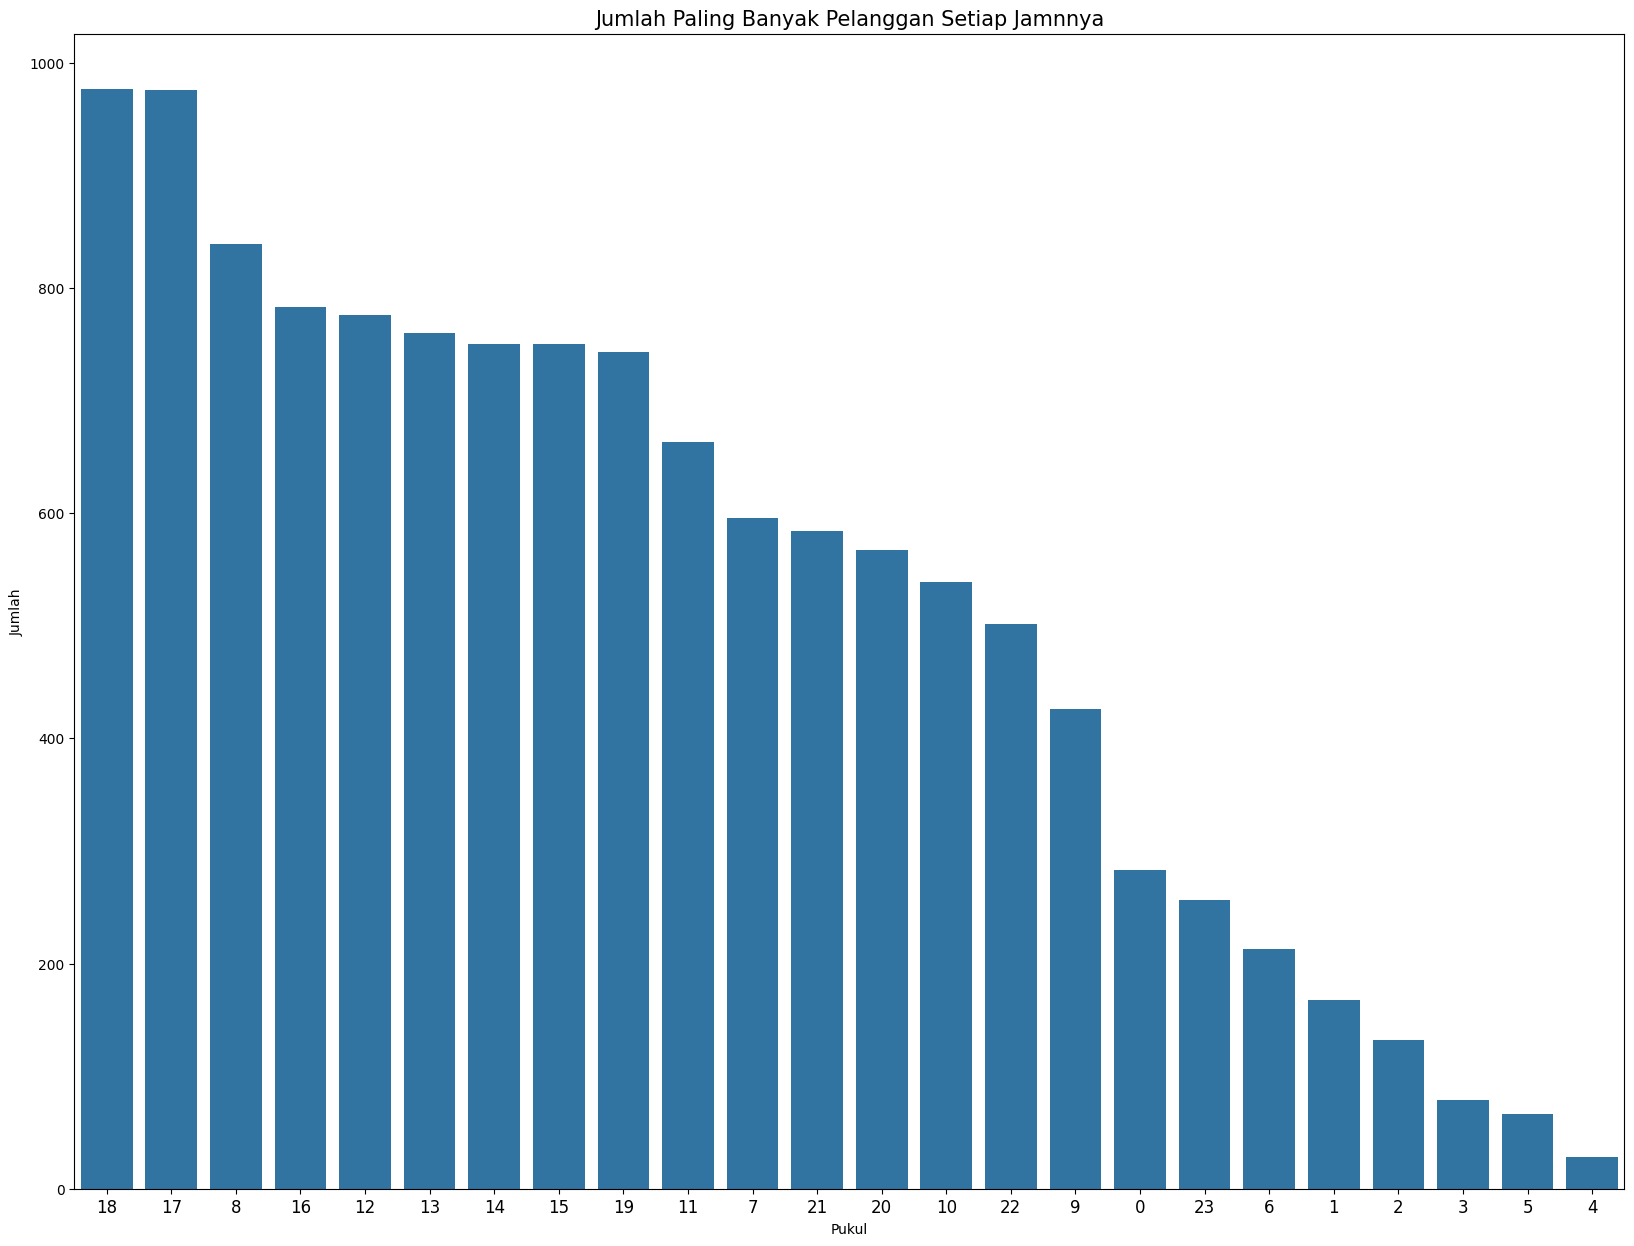

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))


colors = ["#1f77b4"]
sns.barplot(
    y="max",
    x="hr1",
    data=by_hour.sort_values(by="max", ascending=False),
    palette=colors
)
plt.title("Jumlah Paling Banyak Pelanggan Setiap Jamnnya", loc="center", fontsize=15)
plt.ylabel('Jumlah')
plt.xlabel('Pukul')
plt.tick_params(axis='x', labelsize=12)




plt.show()

Grafik diatas menampilkan jumlah keseluruhan pelanggan dalam meminjam sepeda setiap jamnnya dan diperoleh bahwa pelanggan paling banyak meminjam sepedanya pada pukul 18.00.

## Conclusion

 Dengan demikian. dapat disimpulkan bahwa jumlah terbanyak keseluruhan pelanggan yang meminjam sepeda terjadi saat bukan holiday dan pukul 18 adalah waktu dimana terdapat jumlah pelanggan yang meminjam sepeda paling banyak.





In [176]:
by_day.to_csv('by_day.csv', index=False)

In [177]:
by_hour.to_csv('by_hour.csv', index=False)